In [1]:
import csv



In [ ]:
with open("/Users/arth/Documents/DataMining/HW1/3_data/AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    count = 0
    author = set()
    venues = set()
    publications = set()
    citations = set()
    index = ""
    for row in apfile:
        if row.startswith("#@"):            
            for column in row[3:].split(";"):
                 author.add(column.strip())
        elif row.startswith("#c"):
            venues.add(row)
        elif row.startswith("#%"):
            citations.add(index+row)
        elif row.startswith("#index"):
            index = row[7:]
            publications.add(row)
    # The total number contain the null author value as well           
    print("Number of Authors" , len(author))
    print("Number of Venues" , len(venues))
    print("Number of References" , len(citations))
    print("Number of Publications" , len(publications))

Number of Authors 1478734
Number of Venues 255686
Number of References 7250326
Number of Publications 1976815


In [4]:
venue_set = set()

with open("/Users/arth/Documents/DataMining/HW1/3_data/AP_train.txt",'r', newline='', encoding="utf8") as apfile:       
    index = ""
    venue = ""
    for row in apfile:
        if row.startswith("#c"):
            if "Principles and Practice of Knowledge Discovery in Databases" in row:
                venue = row[3:]
                venue_set.add(venue)

print("Venues lists are ")
for venue in venue_set:            
    print(venue)

Venues lists are 
Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)

PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)



In [6]:
author_publications = {}

# Considering each Citation as one
with open("/Users/arth/Documents/DataMining/HW1/3_data/AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    for row in apfile:
        if row.startswith("#@"):            
            for column in row[3:].split(";"):
                if author_publications.get(column.strip()) == None:
                    author_publications[column.strip()] = 1
                else:
                    author_publications[column.strip()]  += 1
                    
authors = list(author_publications.keys())
publications = list(author_publications.values()) 


In [7]:
# Removing values for the null author and it's respective publication count , 
# because it is an outlier in this case and has a value much greater than the mean. 

null_index = authors.index("")
del authors[null_index]
del publications[null_index]

Matplotlib is building the font cache; this may take a moment.


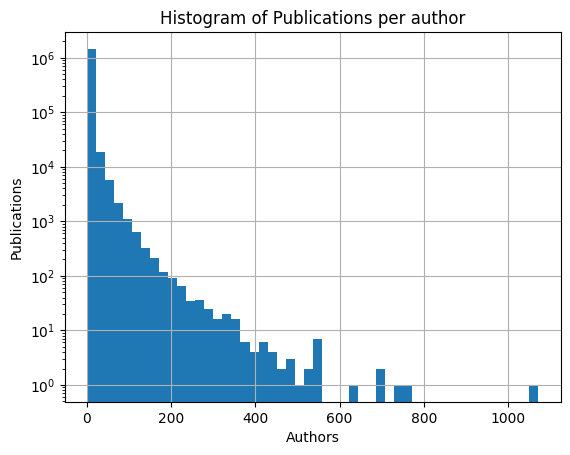

In [8]:
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.xlabel('Authors')
plt.ylabel('Publications')
plt.title('Histogram of Publications per author')
plt.grid(True)

plt.hist(publications,bins=50,log=True)
plt.show()

In [9]:
def xMean(xlist):
    xsum = 0;    
    for x in xlist:
        xsum += x
    return(xsum/len(xlist))

In [10]:
print("Mean of publications per author = " , xMean(publications))


Mean of publications per author =  3.291785602945224


In [11]:
def xMedian(xList):
    xList.sort()    
    if len(xList)%2 == 0:
        return((xList[int(len(xList)/2-1)] + xList[int(len(xList)/2)])/2 , int(len(xList)/2-1) , int(len(xList)/2))
    else:
        return(xList[math.ceil(len(xList)/2-1)] , int(math.ceil(len(xList)/2-1)))        

In [12]:
print("Median of publications per author = " , xMedian(publications)[0])


Median of publications per author =  1


In [13]:
def xQuartile(xList):
    xList.sort()    
    
    med = xMedian(xList)    
    second = int(med[0])
    first = xMedian(xList[1:med[1]])[0]
    third = xMedian(xList[med[1]:])[0] 
    
    return(first,second,third)

In [14]:
print("Firt, Second and Third Quartile are as follows : " , xQuartile(publications))


Firt, Second and Third Quartile are as follows :  (1, 1, 2)


In [15]:
def xSD(xList):
    xList.sort()
    mean = xMean(xList)
    
    xSDSum = 0.0
    for i in xList:
        xSDSum += pow(i-mean,2)
    
    return(pow(1/len(xList) * xSDSum,1/2))

In [16]:
print("SD of publications per author = " , xSD(publications))


SD of publications per author =  8.871889691035385


In [18]:
venue_publications = {}

# Considering each occurence as one publication
with open("/Users/arth/Documents/DataMining/HW1/3_data/AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    for row in apfile:
        if row.startswith("#c"):                        
            if venue_publications.get(row[3:]) == None:
                venue_publications[row[3:]] = 1
            else:
                venue_publications[row[3:]]  += 1
                    
venues = list(venue_publications.keys())
publications = list(venue_publications.values()) 

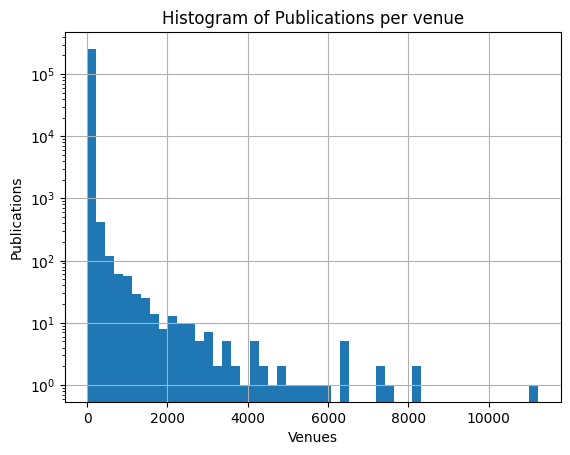

In [19]:
import matplotlib.pyplot as plt

plt.xlabel('Venues')
plt.ylabel('Publications')
plt.title('Histogram of Publications per venue')
plt.grid(True)

plt.hist(publications,bins=50,log=True)
plt.show()

In [20]:
print("Mean of publications per venue = " , xMean(publications[2:]))
print("Median of publications per venue = " , xMedian(publications[2:])[0])
print("Firt Second and Third Quartile are as follows : " , xQuartile(publications[2:]))
print("SD of publications per venue = " , xSD(publications[2:]))

Mean of publications per venue =  7.715160119522536
Median of publications per venue =  1.0
Firt Second and Third Quartile are as follows :  (1.0, 1, 1)
SD of publications per venue =  83.0926721987981


In [21]:
print("Max publication at Venue = " , venues[list(venue_publications.values()).index(max(list(venue_publications.values())))])


Max publication at Venue =  IEEE Transactions on Information Theory



In [23]:
ref = {}
cite = {}
cite_count_venue = {}
venue_publicationName = {}
# Creatig data structures used for 3.3 
with open("/Users/arth/Documents/DataMining/HW1/3_data/AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    index = 0
    venue = ""
    for row in apfile:        
        if row.startswith("#index"):                        
            index = int(row[7:])
        elif row.startswith("#c"):                        
            venue = row[3:]
            if venue_publicationName.get(index) == None:
                venue_publicationName[index] = venue
        elif row.startswith("#%"):
            if ref.get(index) == None:
                ref[index] = 1
            else:
                ref[index]  += 1
                
            if cite.get(int(row[3:])) == None:
                cite[int(row[3:])] = 1
            else:
                cite[int(row[3:])]  += 1                            
            
            cite_venue = venue_publicationName.get(int(row[3:]))
            if cite_count_venue.get(cite_venue) == None:
                cite_count_venue[cite_venue] = 1
            else:
                cite_count_venue[cite_venue] += 1
                    
print("Total references", len(ref))
print("Total cites", len(cite))

Total references 797454
Total cites 871089


In [24]:
print("Publication index with max References = " , list(ref.keys())[list(ref.values()).index(max(list(ref.values())))] , "with value = ",max(list(ref.values())))
print("Publication index with max Citations = " , list(cite.keys())[list(cite.values()).index(max(list(cite.values())))] , "with value = ",max(list(cite.values())))

Publication index with max References =  719353 with value =  772
Publication index with max Citations =  408396 with value =  7753


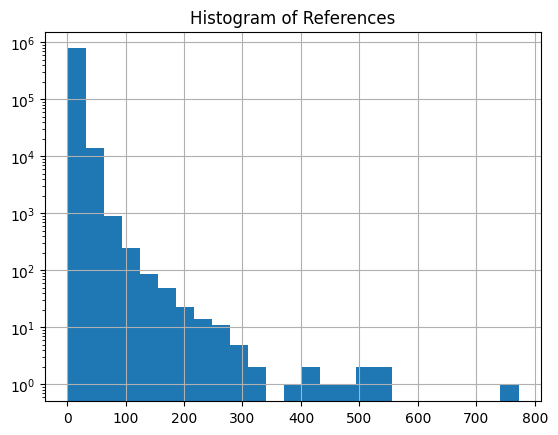

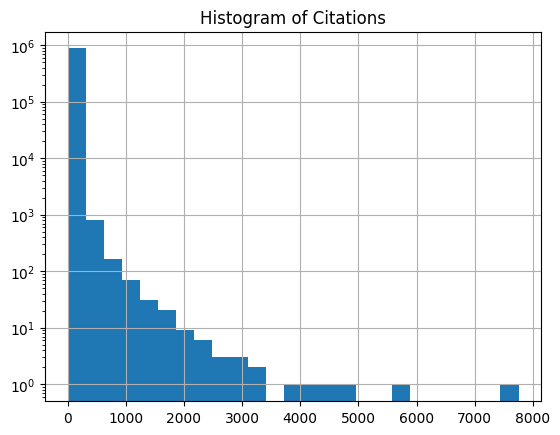

In [25]:
import matplotlib.pyplot as plt

plt.title('Histogram of References')
plt.grid(True)

plt.hist(list(ref.values()),bins=25,log=True)
plt.show()


plt.title('Histogram of Citations')
plt.grid(True)

plt.hist(list(cite.values()),bins=25,log=True)
plt.show()

In [26]:
venue_impact = {}

for venue in cite_count_venue.keys():   
    venue_impact[venue] = 0    
    if venue != 'None' and venue_publications.get(venue) != None :
        venue_impact[venue] = cite_count_venue[venue]/venue_publications[venue] 

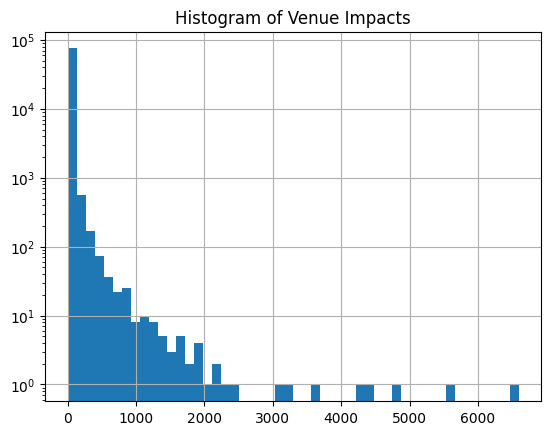

In [27]:
import matplotlib.pyplot as plt

plt.title('Histogram of Venue Impacts')
plt.grid(True)

plt.hist(list(venue_impact.values()),bins=50,log=True)
plt.show()

In [28]:
max_index = list(venue_impact.values()).index(max(list(venue_impact.values())))
print("Venue with max impact = " , list(venue_impact.keys())[max_index])

Venue with max impact =  Computers and Intractability: A Guide to the Theory of NP-Completeness



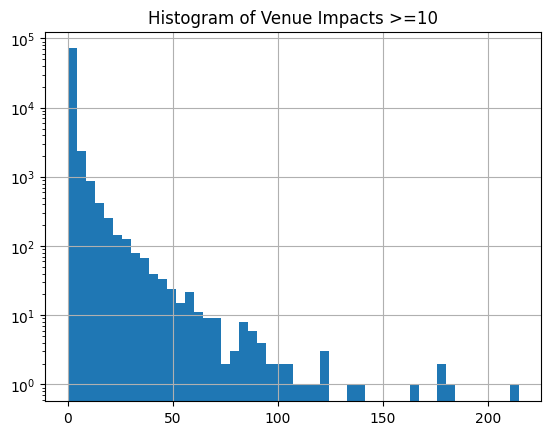

In [29]:
venue_impact = {}

for venue in cite_count_venue.keys():   
    venue_impact[venue] = 0    
    if venue != 'None' and venue_publications.get(venue) != None and venue_publications[venue] >=10 :
        venue_impact[venue] = cite_count_venue[venue]/venue_publications[venue]        

import matplotlib.pyplot as plt

plt.title('Histogram of Venue Impacts >=10')
plt.grid(True)

plt.hist(list(venue_impact.values()),bins=50,log=True)
plt.show()

In [30]:
max_index = list(venue_impact.values()).index(max(list(venue_impact.values())))
print("Venue with max impact = " , list(venue_impact.keys())[max_index] , " with value = " , list(venue_impact.values())[max_index])
print("Median of citations" , xMedian(list(cite_count_venue.values()))[0])

Venue with max impact =  Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications
  with value =  214.6086956521739
Median of citations 5.0


In [31]:
year_publications = {}
year_avg = {}

with open("/Users/arth/Documents/DataMining/HW1/3_data/AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    index = 0
    year = 0
    for row in apfile:        
        if row.startswith("#index"):                        
            index = int(row[7:])
        elif row.startswith("#t") and len(row)==8:
            year = int(row[3:])            
            if year_publications.get(year) == None:
                year_publications[year] = {"publications":0,"cites":0,"refs":0}
                year_publications[year]["publications"] = 1                
                if cite.get(index) != None:
                    year_publications[year]["cites"] = cite.get(index)
                if ref.get(index) != None:
                    year_publications[year]["refs"] = ref.get(index)
            else:
                year_publications[year]["publications"] += 1
                if cite.get(index) != None:
                    year_publications[year]["cites"] += cite.get(index)
                if ref.get(index) != None:
                    year_publications[year]["refs"] += ref.get(index)

In [32]:
import collections

for year in year_publications.keys():
    year_avg[year] = {}
    year_avg[year]["cites"] = year_publications[year]["cites"]/ year_publications[year]["publications"]
    year_avg[year]["refs"] = year_publications[year]["refs"]/ year_publications[year]["publications"]
    #print("Averages for year" ,year, year_avg[year])

year_avg = collections.OrderedDict(sorted(year_avg.items()))
# for year in year_avg.keys():
#     print("Averages for year" ,year, year_avg[year])

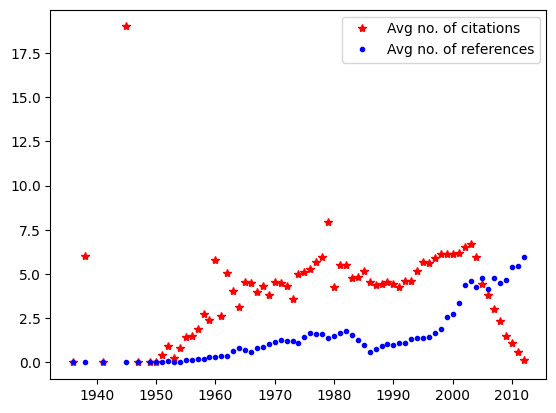

In [33]:
# Plotting avg references and citations / year

x = list(year_avg.keys())
y1 = list([year_avg[year]["cites"] for year in x])
y2 = list([year_avg[year]["refs"] for year in x])

fig, ax = plt.subplots()
ax.plot(x, y1, 'r*', label='Avg no. of citations')
ax.plot(x, y2, 'b.', label='Avg no. of references')

legend = ax.legend(loc='upper right')

plt.show()